In [3]:
import tensorflow as tf
import numpy as np

print(tf.__version__) # 텐서 버전 체크

2.0.0-alpha0


## Hypothesis 와 Cost

#### Hypothesis는 가설, 예측값으로 모델링을 통해 예측한 위치를 생각하면 된다.
#### W = weight 값으로 가중치, b = bias로 편차, 빼기도 한다.

$$ H(x) = Wx + b $$

#### Cost는 비용, 실제값과 예측값의 차이로 오차라 생각하면 된다.
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

#### Cost를 구하기 위해 우리는 제곱하는 방법과 평균을 내는 방법을 알아야 한다.

In [4]:
v = [1., 2., 3., 4.] # 숫자 뒤에 .을 붙이는 것은 실수로 인식하게 위함
tf.reduce_mean(v) # 2.5가 나온다. 평균값이다. 

<tf.Tensor: id=6, shape=(), dtype=float32, numpy=2.5>

In [5]:
tf.square(3) # square 는 제곱

<tf.Tensor: id=9, shape=(), dtype=int32, numpy=9>

In [6]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0) # 초기 weight 값을 2로 설정한다.
b = tf.Variable(0.5) # 초기 bias 값을 0.5로 설정한다.

hypothesis = W * x_data + b # 설정한 W와 b를 기반으로 Hypothesis의 식을 설정

In [7]:
W.numpy(), b.numpy() # numpy를 통해 W와 b값을 체크

(2.0, 0.5)

In [8]:
hypothesis.numpy() # 각 array별 hypothesis 값 노출

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

#### 그래프로 상황을 그려보자

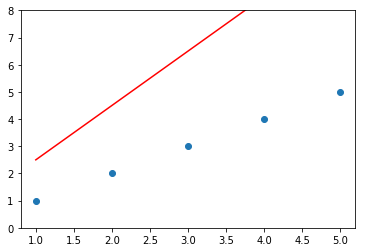

In [9]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')   # X축은 x_data, Y축은 y_data의 값을 넣고 마킹은 'o'로
plt.plot(x_data, hypothesis, 'r-')   # X축은 x_data, Y축은 hypothesis를 넣고 마킹은 '직선'으로
plt.ylim(0, 8) # 그림의 범위를 지정, y축으로 0부터 8까지
plt.show() # 없어도 그래프가 뜨기는 하지만 깔끔하게 보려면

#### 저 선은 예측값이고 점은 실제값이다.
#### X축을 기준으로 보았을 때, 계속 오차가 벌어지는 게 보인다.

## Cost

#### Cost는 저 오차를 다 합쳐서 평균낸 것, 그런데 왜 제곱을 하냐면!
#### 지금처럼 점이 아래에 다 몰린 게 아니라 선 위로도 갔으면 오차가 - + 로 들쭉날쭉한다.
#### 그러니까 거리 기준으로 확실히 하도록 제곱한 값을 쓰는 것

In [10]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [11]:
with tf.GradientTape() as tape: # 컨텍스트 안에서 실행된 모든 변수를 tape에 기록
    hypothesis = W * x_data + b  # 이 식의 변수는 W와 b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data)) 
    
W_grad, b_grad = tape.gradient(cost, [W, b]) # tape.gradient( 이 식 안의, 이 변수를 찾아서 미분한다음 왼쪽으로 넘겨라)
W_grad.numpy(), b_grad.numpy() # W와 b의 gradient값 체크 # # https://to-chelin.com/%eb%a8%b9%ed%8a%80%ec%82%ac%ec%9d%b4%ed%8a%b8/

(25.0, 7.0)

## 파라미터 업데이트

In [12]:
learning_rate = 0.01 # 학습률을 설정한다.

W.assign_sub(learning_rate * W_grad) # learning rate를 W의 기울기에 곱하고, 그 값을 W의 새로운 값에 넣어준다.
b.assign_sub(learning_rate * b_grad) # learning rate를 b의 기울기에 곱하고, 그 값을 b의 새로운 값에 넣어준다.

W.numpy(), b.numpy() # 새로 업데이트한 W와 b값을 확인

(1.75, 0.43)

(0, 8)

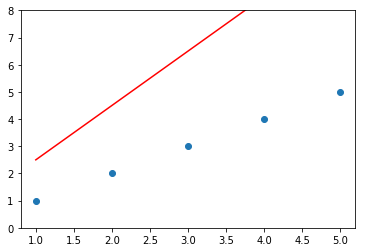

In [13]:
plt.plot(x_data, hypothesis.numpy(), 'r-') # 확인하기 어렵겠지만 조금은 선이 내려갔을 거다. (아마도...?)
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## 이걸 반복해보자

    0 |     2.4520 |     0.3760 |  45.660004
   10 |     1.1036 |     0.0034 |   0.206336
   20 |     1.0128 |    -0.0209 |   0.001026
   30 |     1.0065 |    -0.0218 |   0.000093
   40 |     1.0059 |    -0.0212 |   0.000083
   50 |     1.0057 |    -0.0205 |   0.000077
   60 |     1.0055 |    -0.0198 |   0.000072
   70 |     1.0053 |    -0.0192 |   0.000067
   80 |     1.0051 |    -0.0185 |   0.000063
   90 |     1.0050 |    -0.0179 |   0.000059


(0, 8)

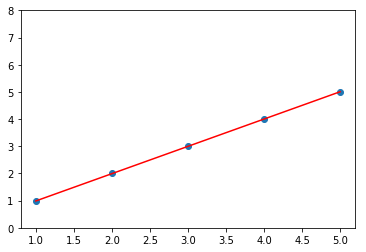

In [18]:
W = tf.Variable(2.9) # 처음 W의 값을 2.9로 설정
b = tf.Variable(0.5) # 처음 b의 값을 0.5로 설정

for i in range(100):# 100번 아래의 식을 돌림
    with tf.GradientTape() as tape: 
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b]) # tape안의 cost와 hyporhesis의 gradient(기울기)를 구한다.
    W.assign_sub(learning_rate * W_grad)         # learning rate에 W의 기울기를 곱하고 그 값을 W에 추가한다.
    b.assign_sub(learning_rate * b_grad)         # learning rate에 b의 기울기를 곱하고 그 값을 b에 추가한다.
    if i % 10 == 0: # 10으로 나눠서 나머지가 0인 수, 그러니까 10의 배수이면 아래로 내려간다.
        print("{:5} | {:10.4f} | {:10.4f} | {: 10.6f}".format(i, W.numpy(), b.numpy(), cost))  # s늠 문자, d는 정수, f는 실수

# 그래프 그리기
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r-')
plt.ylim(0, 8)        

In [19]:
#  Gradient Descient 과정을 100번 반복하니
#  예측값이 실제값과 동일해졌다.

### Predict

In [21]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


In [22]:
#### 이걸 하는 이유는. loop문이 잘 돌아갔을 경우에
#### 결국 b의 값은 0이 되고 w는 1이 되어야 하기 때문
#### 결과를 통해 값이 잘 조정된 것을 알 수 있음